Машинное обучение занимается построением математических моделей для исследования данных.

------

Формула Байеса
$$
    P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)},
$$
где

$P(A)$ — априорная вероятность гипотезы A;

$P(A\mid B)$ — вероятность гипотезы A при наступлении события B (апостериорная вероятность);

$P(B\mid A)$ — вероятность наступления события B при истинности гипотезы A;

$P(B)$ — полная вероятность наступления события B.

------

Формула полной вероятности
$$
    P(B) = \sum\limits_i P(B \mid A_i) \cdot P(A_i),
$$
где

$A_i$ - несовместные гипотезы и $\sum\limits_i P(A_i) = 1$

------

Формула Байеса
$$
    P(A_j \mid B) = \frac{P(B \mid A_j) \cdot P(A_j)}{\sum\limits_i P(B \mid A_i) \cdot P(A_i)}
$$

------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

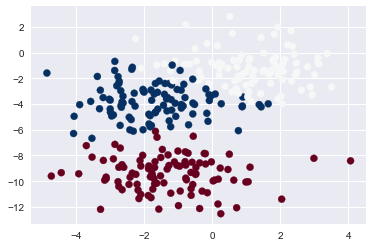

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers=3, random_state=2, cluster_std=1.3)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap='RdBu')
plt.savefig('out/scatter.png', dpi=300)

In [3]:
??make_blobs

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None)

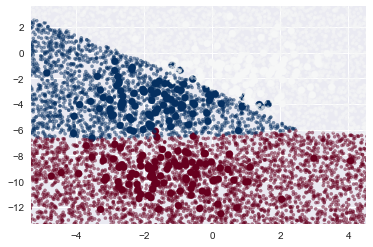

In [6]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [12,18] * rng.rand(10000,2)
ynew = model.predict(Xnew)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu")
lim=plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=10, cmap="RdBu", alpha=0.5)
plt.axis(lim)
plt.savefig('out/NB_classification.png', dpi=300)

In [7]:
yprob = model.predict_proba(Xnew)
yprob[0:10].round(2)

array([[ 0.  ,  0.97,  0.03],
       [ 0.  ,  0.57,  0.43],
       [ 0.  ,  0.32,  0.68],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.93,  0.07,  0.  ],
       [ 0.  ,  0.97,  0.03],
       [ 0.  ,  1.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.02,  0.98],
       [ 0.  ,  1.  ,  0.  ]])

In [8]:
model.predict_proba([[-4,-12], [0,0]])

array([[  9.99999988e-01,   5.58908868e-16,   1.23672713e-08],
       [  1.85865284e-11,   9.87781748e-01,   1.22182523e-02]])

Работа с текстовыми признаками

In [9]:
sample = ['На работе и дома', 'А вот у нас на балконе', 'На чем стоит этот дом']

Векторизации данных на основе числа слов

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
vec = CountVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,балконе,вот,дом,дома,на,нас,работе,стоит,чем,этот
0,0,0,0,1,1,0,1,0,0,0
1,1,1,0,0,1,1,0,0,0,0
2,0,0,1,0,1,0,0,1,1,1


Терма-обратная частотность документа. Term Frequency-Inverse Document Frequency.
Большой вес получют слова с высокой частотой в пределах конкретного документа и с низкой частотой употреблений в других документах.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,балконе,вот,дом,дома,на,нас,работе,стоит,чем,этот
0,0.000000,0.000000,0.000000,0.652491,0.385372,0.000000,0.652491,0.000000,0.000000,0.000000
1,0.546454,0.546454,0.000000,0.000000,0.322745,0.546454,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.479528,0.000000,0.283217,0.000000,0.000000,0.479528,0.479528,0.479528


In [12]:
#from sklearn.datasets import fetch_20newsgroups
#data = fetch_20newsgroups()
#data.target_names

In [13]:
from sklearn.datasets import load_files
data_train = load_files('20news/20news-bydate-train', encoding='latin-1');
data_test = load_files('20news/20news-bydate-test', encoding='latin-1');

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [15]:
model.fit(data_train.data, data_train.target)
labels = model.predict(data_test.data)

In [16]:
print(labels)
print(data_test.target)

[2 0 2 ..., 2 2 1]
[2 0 3 ..., 3 1 1]


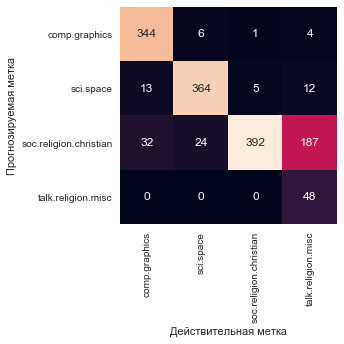

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data_test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
xticklabels=data_train.target_names, yticklabels=data_train.target_names)
plt.xlabel('Действительная метка')
plt.ylabel('Прогнозируемая метка')
plt.savefig('out/NB_text.png', dpi=300)

In [18]:
data_train.target_names[model.predict(['space shuttle'])[0]]

'sci.space'

In [19]:
model.predict_proba(['photo of the apple'])

array([[ 0.25228446,  0.28640266,  0.16497169,  0.29634119]])

In [20]:
data_train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']